In [1]:
import pandas as pd
import chardet

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ale\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:

with open('data-names.csv', 'rb') as f: #открываем файл в бинарном режиме только для чтения
    result = chardet.detect(f.read()) #используем функцию detect для автоматического распознавания кодировок символов в тексте
data = pd.read_csv('data-names.csv',  sep=';', encoding=result['encoding']) #читаем файл с автоматически обнаруженной кодировкой
data

,ID,Name,NumberOfPersons,global_id,Year,Month,ID_en,Name_en,NumberOfPersons_en,Year_en,Month_en,Unnamed: 11
0,Код,Имя,Количество человек,global_id,Год,Месяц,ID_en,Name_en,NumberOfPersons_en,Year_en,Month_en,NaN
1,1,Мария,252,37750254,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Анастасия,224,37750255,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Анна,190,37750256,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Варвара,190,37750257,2015,январь,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9196,10296,Карина,9,2386772585,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9197,10297,Медина,9,2386772586,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9198,10298,Сумая,9,2386772587,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN
9199,10299,Самира,9,2386772588,2022,Август,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#удаляем первую строку
data.drop(index=data.index [0], axis= 0 , inplace= True) 

In [5]:
#приводим названия столбцов в более удобный и читаемый вид
def lower_underscore(name):
    name=name.lower()
    return name
data = data[['Name', 'NumberOfPersons', 'Year']]\
.rename(columns=lower_underscore)\
.rename(columns={'numberofpersons':'number_of_persons'})
data

,name,number_of_persons,year
1,Мария,252,2015
2,Анастасия,224,2015
3,Анна,190,2015
4,Варвара,190,2015
5,Виктория,186,2015
...,...,...,...
9196,Карина,9,2022
9197,Медина,9,2022
9198,Сумая,9,2022
9199,Самира,9,2022


In [6]:
#смотрим на типы данных
data.dtypes

name                 object
number_of_persons    object
year                 object
dtype: object

In [7]:
#в следующих операциях будет производиться суммирование столбца number_of_persons, переводим его в числовой тип
data.number_of_persons = pd.to_numeric(data.number_of_persons)

In [8]:
#проверяем тип данных 
data.dtypes

name                 object
number_of_persons     int64
year                 object
dtype: object

In [9]:
#отбираем всех новорожденных по имени Алиса с 2015-2021 год

data_Alice = data.query('name=="Алиса"')\
.groupby('year')\
.agg({'number_of_persons':'sum'})
data_Alice = data_Alice.iloc[0:7] #берем данные без 2022 года, так как имеются данные только за первую половину 2022 г.
data_Alice

,number_of_persons
year,
2015,2144
2016,2253
2017,2199
2018,2140
2019,2157
2020,1726
2021,1871


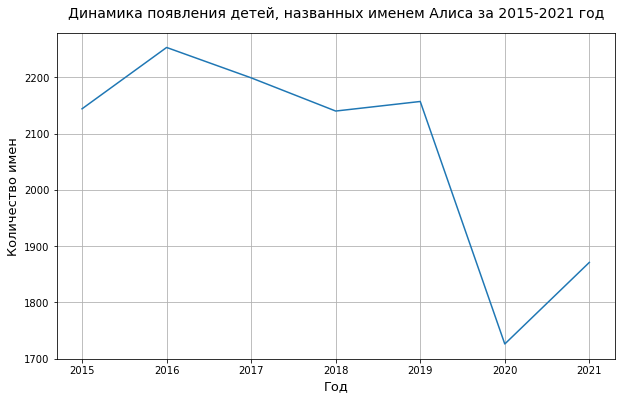

In [36]:
#строим график изменения популярности имени Алиса за 2015-2021 год

plt.figure(figsize=(10,6))
sns.lineplot(data=data_Alice, x='year', y='number_of_persons')
plt.xlabel('Год', fontsize=13)
plt.ylabel('Количество имен', fontsize=13)
plt.title('Динамика появления детей, названных именем Алиса за 2015-2021 год', 
          fontsize=14,  
          pad='15')

plt.grid(True)
plt.show()

array([[<AxesSubplot:title={'center':'number_of_persons'}>]], dtype=object)

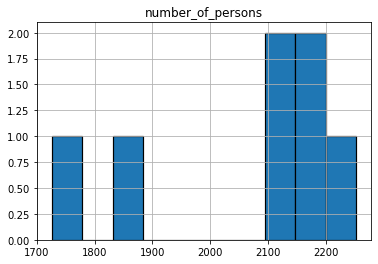

In [40]:
data_Alice.hist(edgecolor='black', linewidth=1.2)